<a href="https://colab.research.google.com/github/sky309/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/%7BSarvesh_Kumar_Yadav_HEALTH_INSURANCE_CROSS_SELL_PREDICTION%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

#Importing few libraries and packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing datasets



In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Reading the Dataset
df= pd.read_csv("/content/drive/MyDrive/AlmaBetter/Modules/Sarvesh Kumar Yadav - Capstone 2 - Supervised ML - Health Insurance Cross Sell/Copy of Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [7]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [10]:
df['Vehicle_Age'].isna().sum()

0

# Checking Null Values

In [11]:
#Shape of Dataframe
df.shape

(381109, 12)

In [12]:
#Checking for null values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#Performing EDA

In [13]:
#Checking for Data Imbalanced
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [14]:
# Checking for Genderwise Resonse rate
df.groupby('Gender')['Response'].value_counts()

Gender  Response
Female  0           156835
        1            18185
Male    0           177564
        1            28525
Name: Response, dtype: int64

In [15]:
#  Female's Participation
df[ df['Gender']=='Female']['Gender'].value_counts()

Female    175020
Name: Gender, dtype: int64

In [16]:
#Feamle's Responses
Female_response= df[(df.Gender== 'Female') & (df.Response ==1)]['Gender'].value_counts()/ (df[ df['Gender']=='Female']['Gender'].value_counts())*100
Female_response

Female    10.390241
Name: Gender, dtype: float64

In [17]:
#Checking for Male's Responses
Male_response= df[(df.Gender== 'Male') & (df.Response ==1)]['Gender'].value_counts()/ (df[ df['Gender']=='Male']['Gender'].value_counts())*100
Male_response

Male    13.841107
Name: Gender, dtype: float64

In [18]:
df['Region_Code'].nunique()

53

In [19]:
# Checking data descriptions
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [20]:
#Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [21]:
# Checking columns Name
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# Leaving id
As id is not going to affect our analysis 

In [22]:
df.drop('id', axis= 1, inplace= True)

# Checking for Numerical and categorical types of variables 
Separating Numerical and Categorical Variable

In [23]:
df_categorical= df[['Gender', 'Driving_License', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel','Previously_Insured']]
df_numerical= df[['Age', 'Region_Code',
        'Annual_Premium',
        'Vintage']]

#Visualisation Part

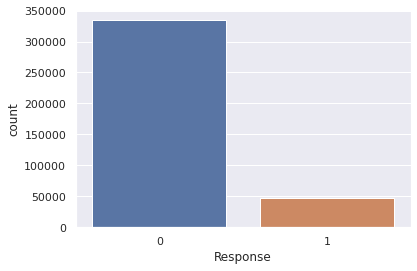

In [24]:
#Checking for response data distribution 
sns.set_theme(style="darkgrid")
sns.countplot(df['Response'],data= df)

# Checking Genderwise Responses

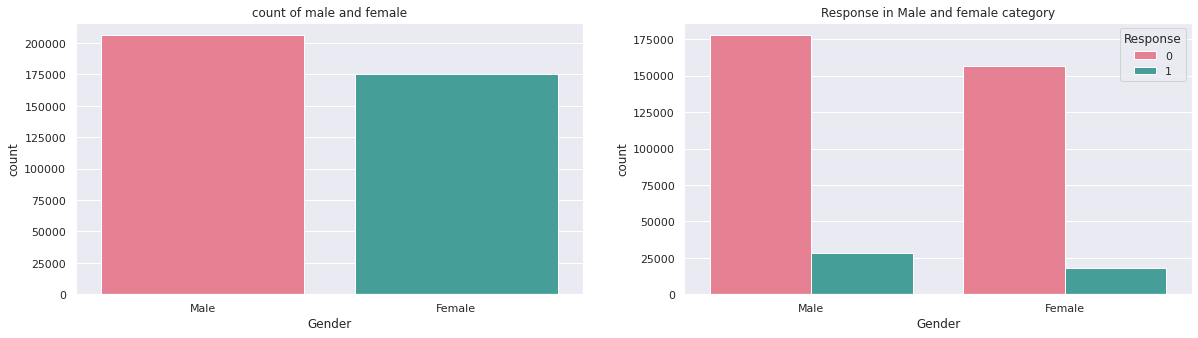

In [25]:
# Checking Male's and Feamle's participations
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(df['Gender'],palette='husl')
plt.title("count of male and female")

#checking for Male's and Female's Responses
plt.subplot(1,2,2)
sns.countplot(df['Gender'], hue = df['Response'],palette="husl")
plt.title("Response in Male and female category")
plt.show()

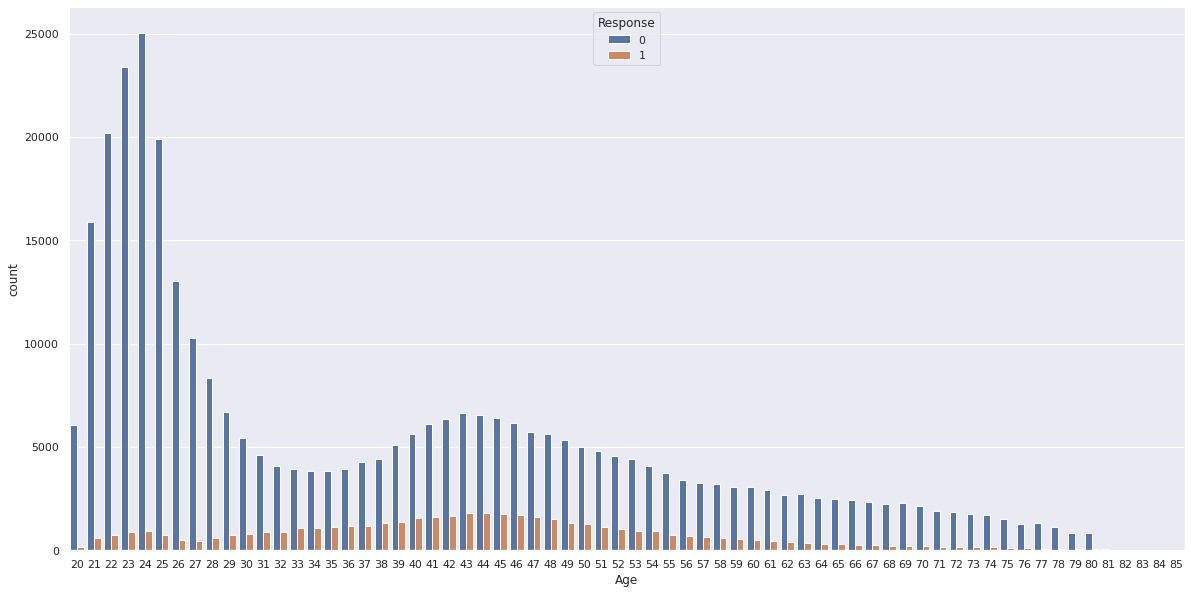

In [26]:
#Age VS Response
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df)

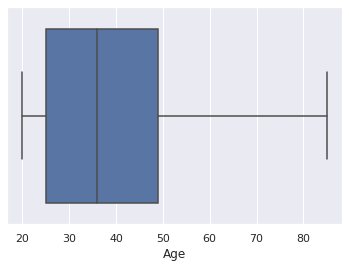

In [27]:
# To detect outliers
sns.boxplot(df['Age'])

# Driving License

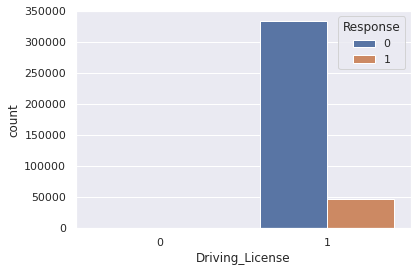

In [28]:
sns.countplot(df['Driving_License'],hue=df['Response'])

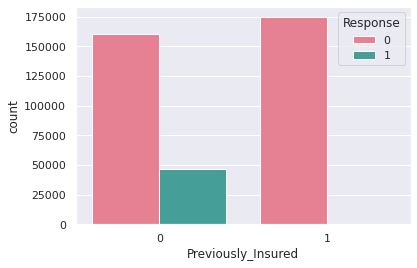

In [29]:
# Previous Insured Person responses
sns.countplot(x='Previously_Insured',hue='Response',data=df,palette='husl')

# Vehicle Age vs. Response

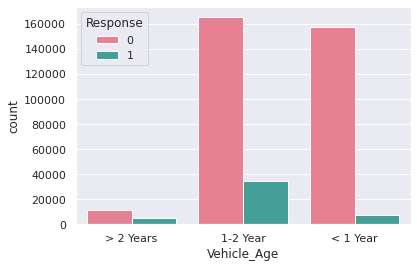

In [30]:
sns.countplot(x='Vehicle_Age',hue='Response',data=df,palette='husl')

# Checking for annual premium data distribution

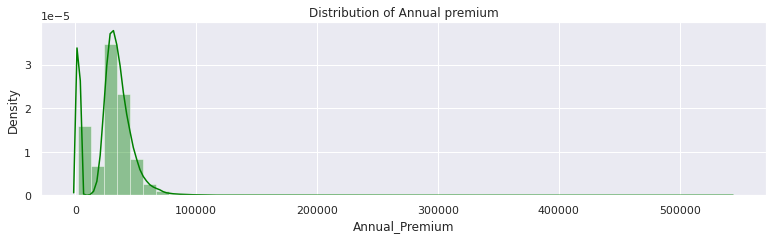

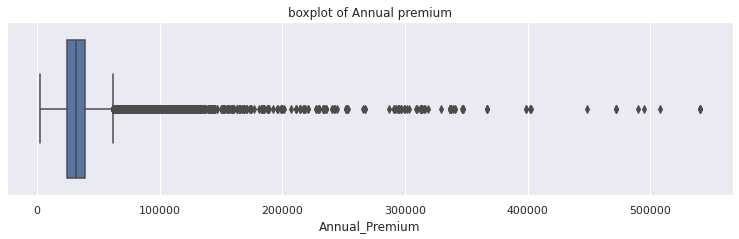

In [31]:

plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

# Correlation plot

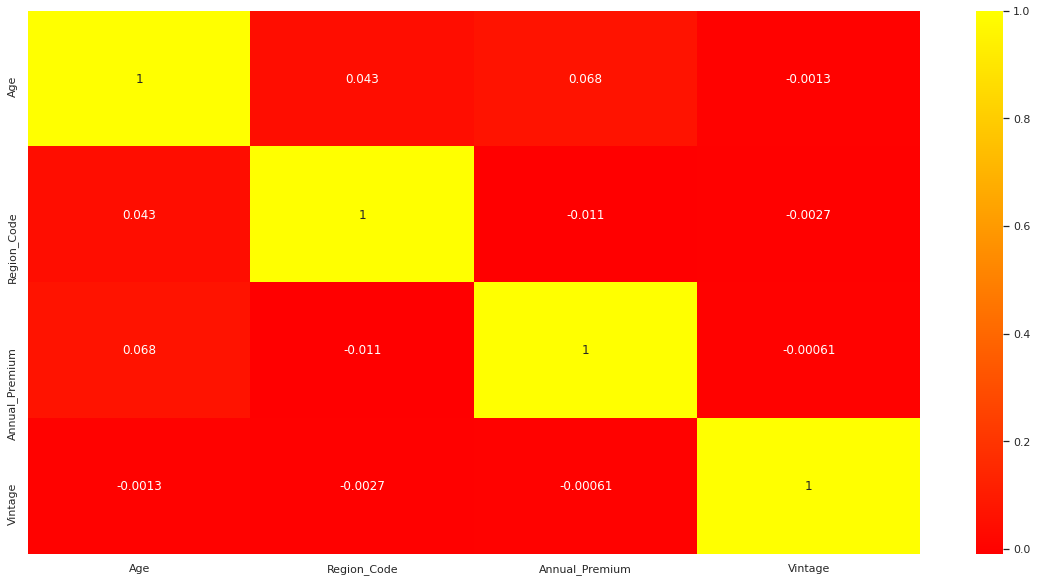

In [32]:
# Checking correlation between numerical values
f, ax= plt.subplots(figsize= (20, 10))
sns.heatmap(df_numerical.corr(), ax= ax, annot =True, cmap='autumn')

# Visualisation for Numerical Values

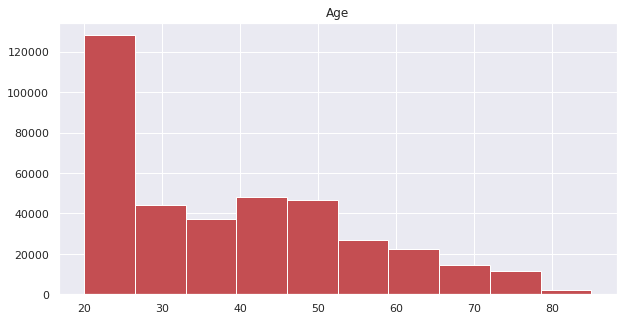

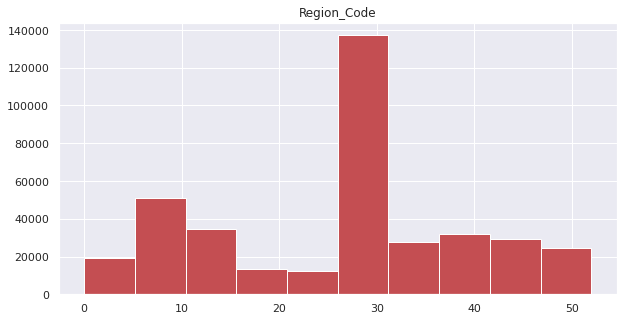

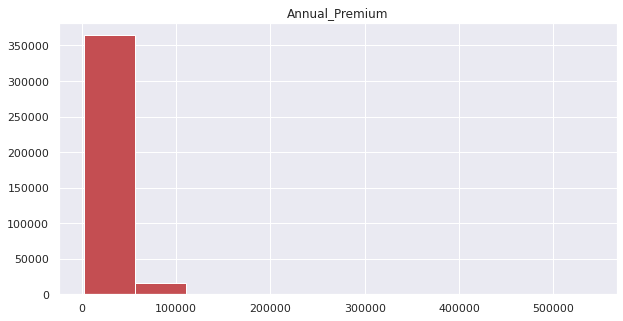

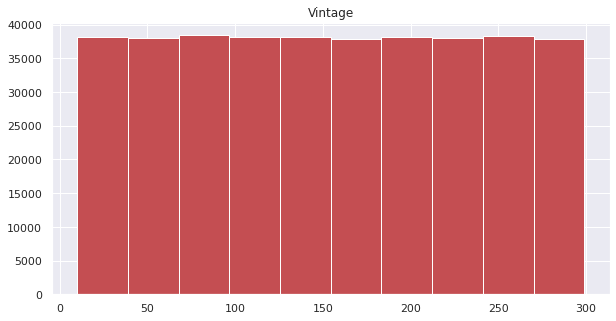

In [33]:
for i in df_numerical.columns:
    plt.figure(figsize= (10,5))
    plt.hist(df_numerical[i], color='r')
    plt.title(i)
    plt.show()

# Visualisation for categorical values

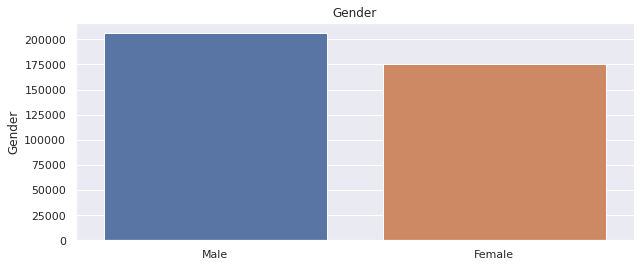

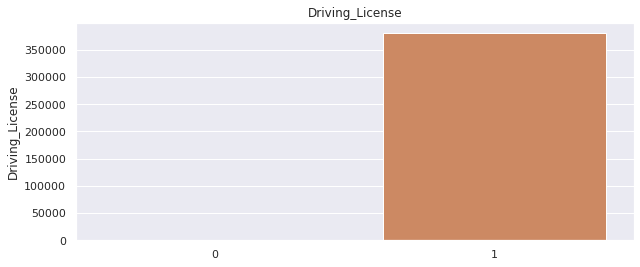

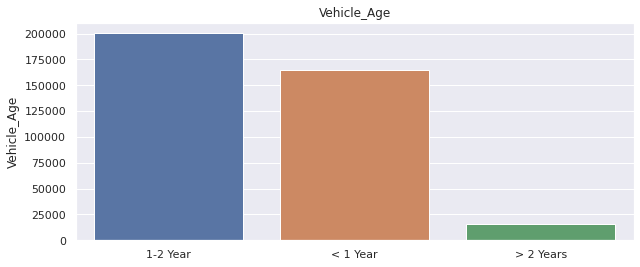

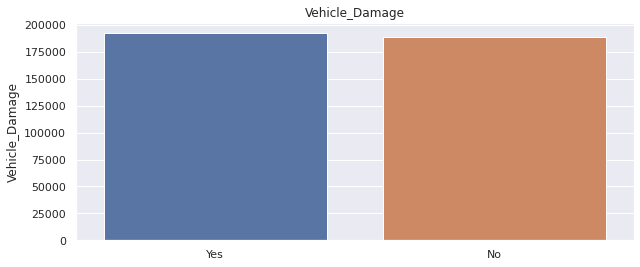

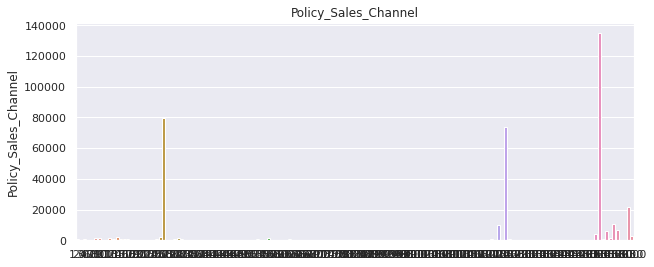

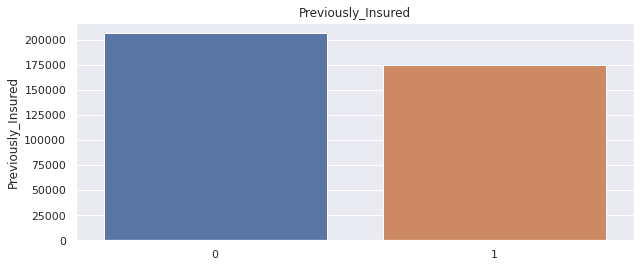

In [34]:
for i in df_categorical.columns:
    plt.subplots(figsize= (10,4))
    sns.barplot(df_categorical[i].value_counts().index, df_categorical[i].value_counts()).set_title(i)
    plt.show()

# Pivot table

In [35]:
pd.pivot_table(df, index= 'Response', values= ['Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'])

,Age,Annual_Premium,Driving_License,Policy_Sales_Channel,Previously_Insured,Region_Code,Vintage
Response,,,,,,,
0,38.178227,30419.160276,0.997694,114.851040,0.521742,26.336544,154.380243
1,43.435560,31604.092742,0.999122,91.869086,0.003383,26.762963,154.112246


In [36]:
# For categorical vlaues relations to Response
for i in df_categorical:
    print(pd.pivot_table(df,index='Response',columns=i, values='Age'))
    print("--------------------"*10)

Gender       Female       Male
Response                      
0         35.692945  40.373375
1         42.235634  44.200526
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Driving_License          0          1
Response                             
0                65.952010  38.114043
1                59.073171  43.421822
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Vehicle_Age   1-2 Year   < 1 Year  > 2 Years
Response                                    
0            49.761410  24.730594  56.046351
1            45.572344  26.819217  53.069332
----------------------------------------------------------------------------------------------------------------------------------------------

#Data Preprocessing

In [37]:
#Changing categorical value to numerical values
from sklearn.preprocessing import LabelEncoder
lbe= LabelEncoder()
df['Gender'] = lbe.fit_transform(df['Gender'])
df['Vehicle_Age'] = lbe.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = lbe.fit_transform(df['Vehicle_Damage'])

In [ ]:
df.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [38]:
# Checking for duplicate values
duplicate=df[df.duplicated()]
print(duplicate)

        Gender  Age  Driving_License  ...  Policy_Sales_Channel  Vintage  Response
35754        1   23                1  ...                 152.0      173         0
41515        1   39                1  ...                 124.0       27         0
43618        1   40                1  ...                 124.0      209         0
44049        1   39                1  ...                 124.0       64         0
44203        1   44                1  ...                 124.0      155         1
...        ...  ...              ...  ...                   ...      ...       ...
379273       1   58                1  ...                 152.0      150         0
379451       1   41                1  ...                 156.0      111         0
379788       1   38                1  ...                 124.0       42         0
380673       0   37                1  ...                 156.0      176         0
380718       0   35                1  ...                 124.0      187         0

[26

In [39]:
# Now assigning dependent and independent variables
X=df.drop(['Response'],axis=1)
y=df['Response']           

[0.00435367 0.14603324 0.0004639  0.10502967 0.05624898 0.01668571
 0.07388516 0.24674185 0.07230999 0.27824784]


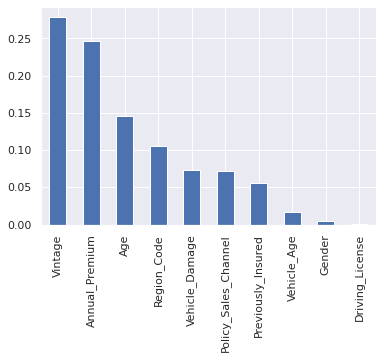

In [40]:
# using classification model
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='bar')
plt.show()

# To handle class Imbalance

In [ ]:
# Redefing Independent variables for data balancing
#X=X.drop(['Driving_License','Gender'],axis=1)

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


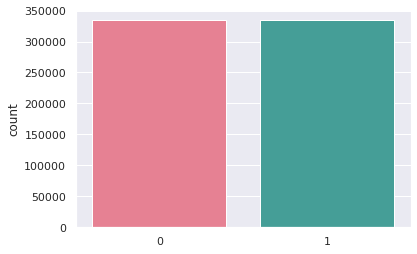

In [ ]:

#from imblearn.over_sampling import RandomOverSampler
#randomsample=  RandomOverSampler()
#X_new,y_new=randomsample.fit_sample(X,y)

#from collections import Counter
#print('Original dataset shape {}'.format(Counter(y)))
#print('Resampled dataset shape {}'.format(Counter(y_new)))
#sns.countplot(y_new,palette='husl')

In [ ]:
#X_new

array([[4.4000e+01, 2.8000e+01, 0.0000e+00, ..., 4.0454e+04, 2.6000e+01,
        2.1700e+02],
       [7.6000e+01, 3.0000e+00, 0.0000e+00, ..., 3.3536e+04, 2.6000e+01,
        1.8300e+02],
       [4.7000e+01, 2.8000e+01, 0.0000e+00, ..., 3.8294e+04, 2.6000e+01,
        2.7000e+01],
       ...,
       [4.6000e+01, 4.1000e+01, 0.0000e+00, ..., 2.1696e+04, 2.6000e+01,
        1.5500e+02],
       [3.7000e+01, 4.6000e+01, 0.0000e+00, ..., 4.4145e+04, 1.2400e+02,
        1.6000e+01],
       [3.8000e+01, 2.8000e+01, 0.0000e+00, ..., 2.8733e+04, 1.2400e+02,
        1.8700e+02]])

In [ ]:
#y_new

array([1, 0, 1, ..., 1, 1, 1])

In [41]:
#dividing the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)



(304887, 10) (76222, 10) (304887,) (76222,)


#Using XGBOOST

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
from sklearn.metrics import f1_score

In [45]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train, y_train)
y_predict = XGB_fit.predict(X_test)
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_test ,y_predict)


print(accuracy_score(y_test,y_predict))
print("ROC_AUC Score:",AUC_xgb)
print(classification_report(y_predict,y_test))

0.878643961061111
ROC_AUC Score: 0.5
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     76222
           1       0.00      0.00      0.00         0

    accuracy                           0.88     76222
   macro avg       0.50      0.44      0.47     76222
weighted avg       1.00      0.88      0.94     76222



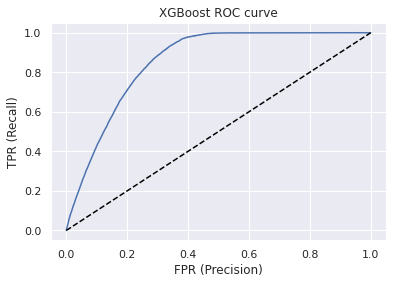

In [46]:

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[66972     0]
 [ 9250     0]]


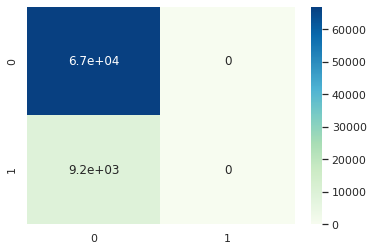

In [47]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rdf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [50]:
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rdf.oob_score_

0.8771348073220571

# Shapely


In [51]:
pip install shap

     |████████████████████████████████| 356 kB 3.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491642 sha256=811b7e8c54adf60229e444d91a7c9de2a995a0320c8b2e272413fc4f5f67f91b
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [52]:
import shap

In [53]:
def shapfunction(model, top_vars):
  explainer= shap.TreeExplainer(model)
  X_shap = X_train
  shap_values= explainer.shap_values(X_shap)
  print(shap.summary_plot(shap_values[1], X_shap, max_display= 10))
  print(shap.summary_plot(shap_values, X_shap, max_display= 10))
  for elem in top_vars:
    print(shap.dependence_plot(elem, shap_values[1], X_train))

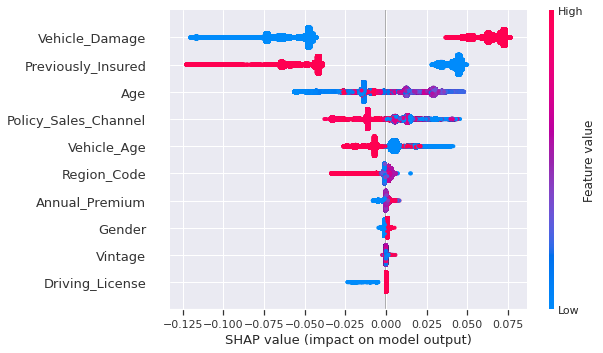

None


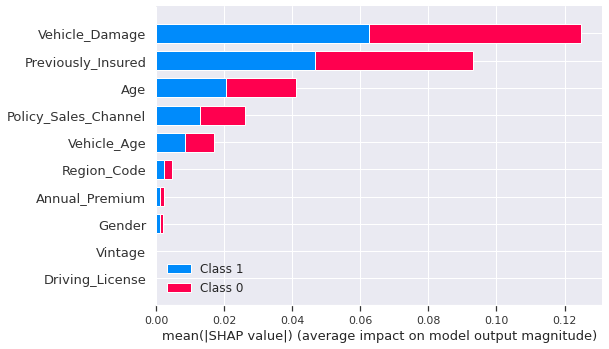

None


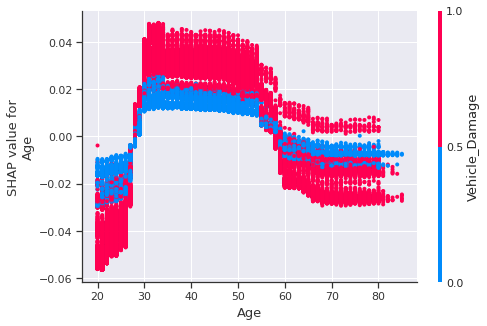

None


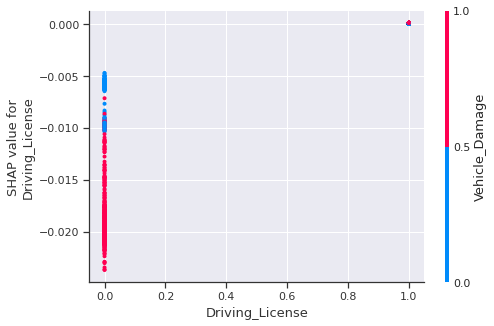

None


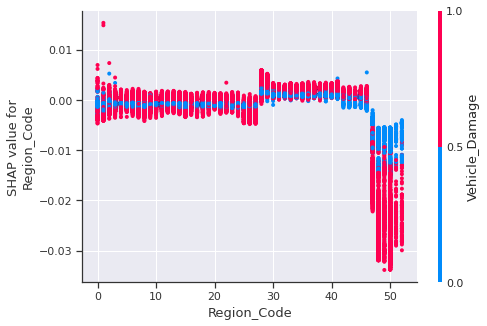

None


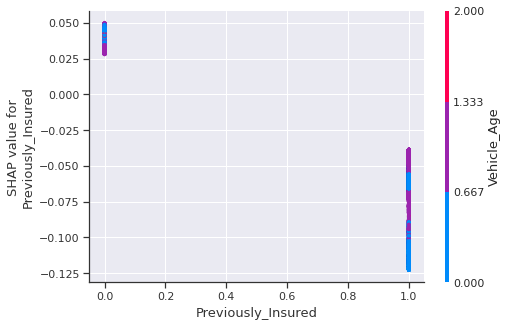

None


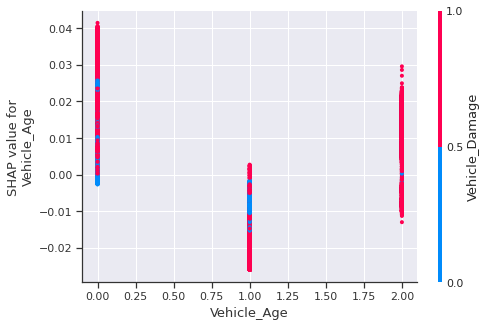

None


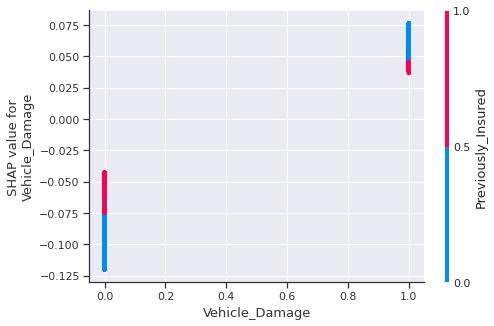

None


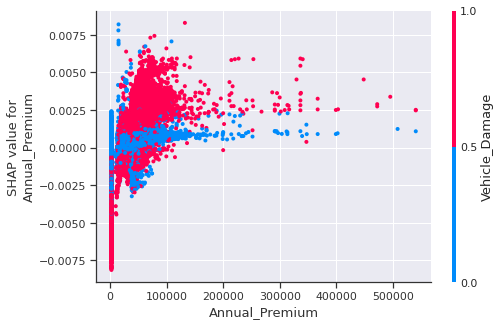

None


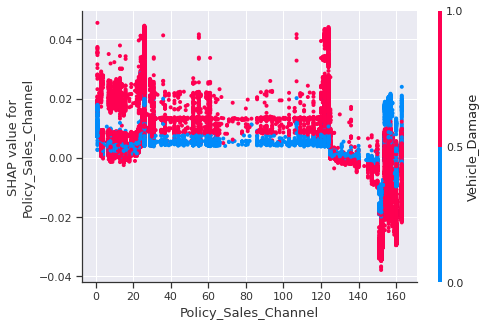

None


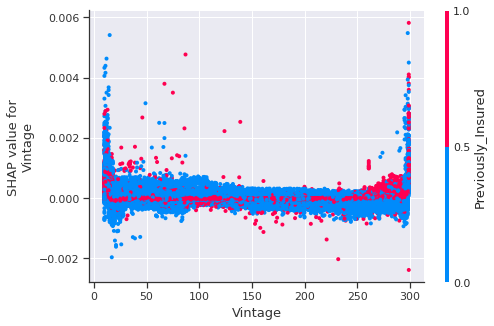

None


In [54]:
top_vars= ['Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage']

shapfunction(rdf, top_vars)

#Conclusion And Inferences

# Customers between the age group 20-40 are highly interested towards our vehicle insurance.
Vehicle Damage, Previously Insured is highly contributing 

1. Customers between the age group 20-40 are highly interested towards our vehicle insurance.

2. Important Features affecting response variable are:
 a) 'Previously_Insured', 
 b) 'Vehicle_Age', 
 c)'Vehicle_Damage'
 d) 'Policy_Sales_Channel'
3. Customers with older Vehicles are more likely to interested.




